


### This notebook will go over a commonly used method for avoiding overfitting. Build a Linear Regression model using Sklearn, Statsmodels and Patsy. Then compare and contrast the results.
 



Train_test_split Validation is the method commonly used for avoiding overfitting.

**Train_test_split validation** is a type of _cross-validation_ that splits the data into $2$ subsets: a subset on which to train our model, and a subset on which to test our model's predictions.

The train_test_split serves 2 useful purposes: it prevents overfitting by not using all of the data and have data we can use to evaluate our model. While this may seem like a relatively simple idea, there are some caveats to putting it into practice if taking a non-random split. 

Another option is to use **k-fold cross-validation**, which is _cross-validation_ applied to more than 2 subsets. That is, the data is partitioned into $k>2$ subsets and train on $k-1$ one of them, holding the last slice for testing. This is done for each of the possible $k-1$ subsets creating a hold portion of the dataset for each iteration of training and validating.


### Example how to create a test-training split, build and compare models and contrast the results


Suppose we want to model the median home price of various houses in the city of Boston using data from the US census. 

We use a copy of the boston house-prices dataset available from Python sklearn - see https://scikit-learn.org/stable/datasets/

The goal here is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose. 

That is a **regression problem**,

In [91]:
#imports

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')


### Load data from sklearn.datasets

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()

#Extract X and y:

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step1: EDA

 

- Clean up the data 

_Note: Since our data is from scikit-learn, it must be cleaned_

- Perform Exploratory data analysis.

 


In [15]:
#read data into dataframe
df= pd.read_csv(r'C:/Users/uknow/Desktop/boston_data.csv')


In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [17]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [18]:
df.shape

(506, 13)

In [19]:
df.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [20]:
# Get the number of unique values for each column 

df.nunique()

CRIM       504
 ZN         26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [21]:
# Check the types

df.dtypes


CRIM       float64
 ZN        float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [22]:
# Summary statistics:

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [23]:
# Count total null

pd.isnull(df).sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df.isna().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Step 2: Use `scikit-learn` Linear Regression to build a model



 - Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that can be used to predict the target variable, MEDV.

 - Score and plot the predictions. 

 - Interpret the results.

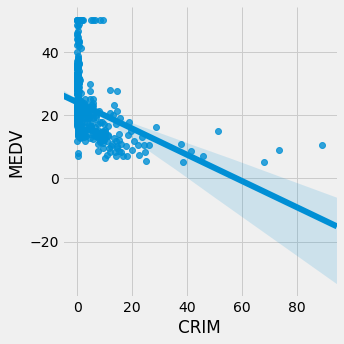

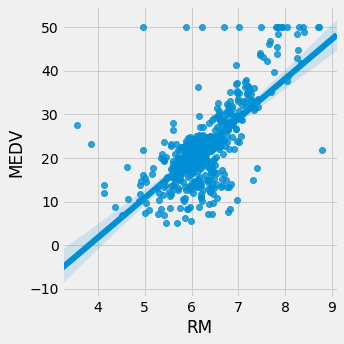

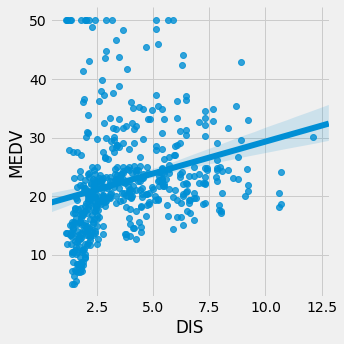

In [24]:
# Plot X- y variables

sns.lmplot(x='CRIM', y='MEDV', data=df)
plt.show()
sns.lmplot(x='RM', y='MEDV', data=df)
plt.show()
sns.lmplot(x='DIS', y='MEDV', data=df)
plt.show()


In [30]:
# It looks like x=RM, the average number of rooms per dwelling, is a better predictor 

x = df['RM'].values
y = df['MEDV'].values


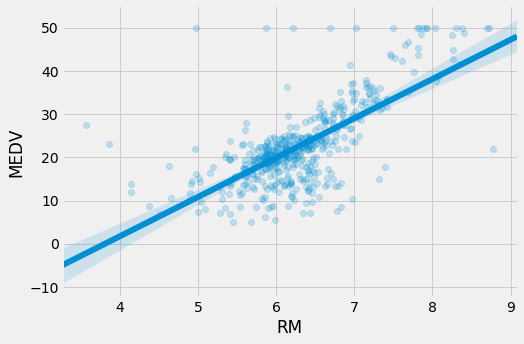

In [31]:
#Visualizing the data 
sns.lmplot(x='RM', y='MEDV', data=df, aspect=1.5, scatter_kws={'alpha':0.2});

#### Using Scipy to compute the coefficients 

In [28]:
import scipy.stats

In [32]:
# Estimate the optimal(least square) slope and intercept

beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
beta_0 = np.mean(y)-(beta_1*np.mean(x))

In [36]:
print(" The y-intercept is", beta_0, " The slope is ", beta_1)

 The y-intercept is -34.670620776438554  The slope is  9.102108981180308


#### Interpretion 

Since y-intercept is negative, there is an "offset" of the regression line from origin

The slope is the increase in median value (MEDV variable) for a 1-unit increase in our predictor variable, the average number of rooms per dwelling (RM). That is, for every unit increase in the average number of rooms per dwelling 
there is an associated increase of 9.1 times $1000 in the median value

### Working With Multiple Features

In [37]:
# Extract the X and y 
X = df.iloc[:, :-1]
y = df['MEDV']

#standardize X
X = (X - X.mean())/X.std()

#fit a lin reg model using sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X, y)

# Estimate the coeficients and print them
print(lreg.intercept_)
print(lreg.coef_)

22.532806324110695
[-1.04412968  1.09530317  0.09239314  0.7213414  -2.17363599  2.57025715
  0.10163739 -3.13909506  2.51992023 -2.13738455 -2.02970765 -3.94200236]


In [112]:
#Get R2 statistic that measures the proportion of variability in y that can be explained by X (model fitness)
lreg.score(X, y)

0.7343070437613076

In [113]:
coefs = pd.DataFrame({
    'Predictor': X.columns,
    'Coef'  : lreg.coef_
}).sort_values(by='Coef', ascending=False)
coefs

,Predictor,Coef
5,RM,2.570257
8,RAD,2.519920
1,ZN,1.095303
3,CHAS,0.721341
6,AGE,0.101637
2,INDUS,0.092393
0,CRIM,-1.044130
10,PTRATIO,-2.029708
9,TAX,-2.137385
4,NOX,-2.173636


Since the coef of Age and INdUS is almost zero we hypothetize that Age and INDUS are not good predictor variablesWe could drop columns AGE and INDUS, and maybe ZN

df.drop("AGE", "INDUS" axis=1, inplace=True)


#### Fit another LinearRegression model using less variables:

In [40]:
feature_cols = ['CRIM','CHAS','NOX', 'RM','DIS','RAD','TAX','PTRATIO','LSTAT']  

X1= df[feature_cols]    
y = df['MEDV']

In [41]:
#Instantiate
linreg = LinearRegression()

#Fit on X1 and y
linreg.fit(X1, y)

# Print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

#R2 statistic
linreg.score(X1, y)

42.18608301936498
[-1.11462941e-01  2.86602898e+00 -1.95345227e+01  3.87503339e+00
 -1.19893871e+00  2.68457812e-01 -1.00484636e-02 -1.08200076e+00
 -5.46013436e-01]


0.7281146628531889

### Step 3: Train_Test_Split

- Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.

- Score and plot both of these approaches. Notice how the metrics change. Interpret the size of training/testing splits

### 70/30 train/test split:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 12) (354,)
(152, 12) (152,)


In [48]:
506*.70

354.2

In [50]:
#fit on X_train and y_train

linreg.fit(X_train, y_train)

#print score
print(linreg.score(X_train, y_train), linreg.score(X_test, y_test))

0.7415650521319029 0.6923424993801792


In [51]:
SSres = np.sum((linreg.predict(X_test) - y_test)**2)

In [52]:
SStot = np.sum((y_test - y_test.mean())**2)

In [53]:
# Manual computation of the score:

test_score = 1 - SSres/SStot
test_score

0.6923424993801792

In [54]:
y_pred = linreg.predict(X_test)
df["Predictions"]=pd.Series(y_pred)

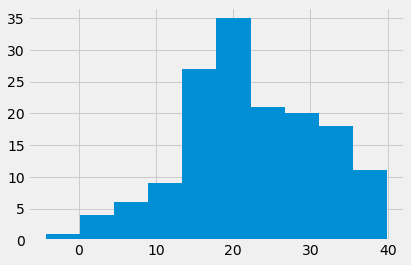

In [55]:
# Plot the distribution of predictions
df["Predictions"].hist()

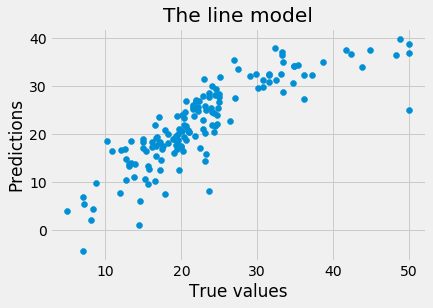

In [56]:
#Visualize data. 
#We look how our predictions compare to the true values

plt.scatter(y_test, y_pred)
plt.title('The line model')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [57]:
# Residuals equals the difference between Y-True and Y-Pred
df['Residuals'] = abs(y_test -y_pred)

In [58]:
df['Residuals'].sum()

551.3938156738494

In [128]:
#the mean of residuals is on average how off our prediction is.
df['Residuals'].mean()

3.6275908925911153

### Is There An Inherent Pattern?

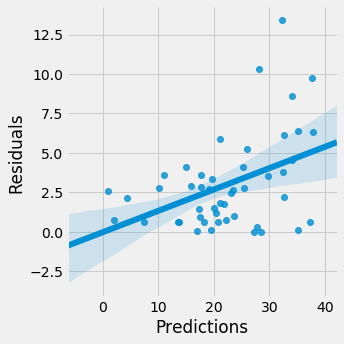

In [60]:
#Use Seaborn's lmplot to plot Errors against the Predicted Value: 

import seaborn as sns
sns.lmplot("Predictions", 'Residuals', data=df)

### Assessing Model Accuracy in Regression settings

#### Measuring the Quality of Fit

- most commonly-used measure is the mean squared error (**test MSE**)

In [61]:
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

MAE: 3.6275908925911144
MSE: 25.269297008721175


In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.6275908925911144
RMSE: 5.026857567976357


### 90/10 train/test splits

In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 12) (354,)
(152, 12) (152,)


In [65]:
506*.90

455.40000000000003

In [66]:
#fit on X_train and y_train

linreg.fit(X_train, y_train)

#print scores
print(linreg.score(X_train, y_train), linreg.score(X_test, y_test))

0.7415650521319029 0.6923424993801792


In [67]:
y_pred = linreg.predict(X_test)

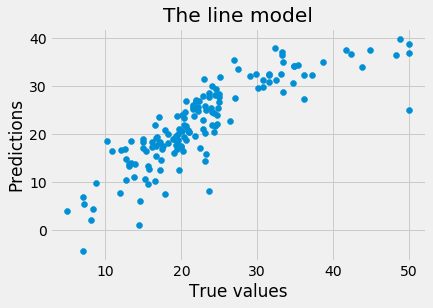

In [69]:
#Visualize data: predictions compared to the true y-values

plt.scatter(y_test, y_pred)
plt.title('The line model')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

### Step 4: k-fold cross-validation

Perform  k-fold cross-validation to avoid the limitations in the train_test_split method


In [71]:

# Split training data into k=cv subsets.Train on k-1 subset & hold the last one for test: Training, validation, testing

from sklearn.model_selection import cross_val_score


#### Try k=10

In [72]:
scores = cross_val_score(estimator=linreg, X=X_train, y=y_train, cv=10)
scores

array([0.60896239, 0.65419818, 0.81076741, 0.69914258, 0.66891996,
       0.44138059, 0.71276572, 0.69067013, 0.77486352, 0.7149131 ])

In [73]:
np.mean(scores)

0.6776583590178569

In [74]:
np.std(scores)

0.09570331420444594

#### Try k=5

In [76]:
scores = cross_val_score(estimator=linreg, X=X_train, y=y_train, cv=5)
scores

array([0.63131023, 0.75111866, 0.58893485, 0.70654202, 0.73789952])

In [77]:
np.mean(scores)

0.6831610570934668

In [78]:
np.std(scores)

0.06281447345150028


### Interpretation of applying K-fold Cross Validation

- We see an improvement of the score from 0.6780171369138018 (for k=10) to 0.6886476676882737 (k-5)

- Also K-fold cross validation is increasing accuracy, giving a better approximation for that accuracy, including less overfitting 

### Step 5: The same workflow using Statsmodels


#### Statsmodels 

 - Adjust the formula using your chosen metrics from the housing data. 

 - While the workflow will be the same the syntax will be different. 

 - Describe your results

In [82]:
# First, we format the data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Set up your new statsmodel.formula handling model

In [83]:

import statsmodels.formula.api as smf

# Test multiple versions/different formulas:

# "- 1" removes the intercept

formulas = {
  
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", 
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX",
    "case4": "MEDV ~ RM + PTRATIO + CRIM",
    "case5": "MEDV ~ RM"
    
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          1.38e-321
Time:                        17:48:39   Log-Likelihood:                -1567.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
model = smf.ols(formula=formulas['case2'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     289.9
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.83e-84
Time:                        12:00:39   Log-Likelihood:                -1646.3
No. Observations:                 506   AIC:                             3299.
Df Residuals:                     503   BIC:                             3311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2059      3.339     -5.452      0.000     -24.767     -11.645
NOX          -18.9706      2.530     -7.497      0.000     -23.942     -13.999
RM             8.1567      0.417     19.546      0.000       7.337       8.977
==============================================================================
Omnibus:                      191.473   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.455
Skew:                           1.518   Prob(JB):                    1.90e-259
Kurtosis:                       9.877   Cond. No.                         88.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model = smf.ols(formula=formulas["case3"], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     75.66
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.88e-29
Time:                        17:51:56   Log-Likelihood:                -1773.7
No. Observations:                 506   AIC:                             3553.
Df Residuals:                     503   BIC:                             3566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6359      1.347     26.465      0.000      32.990      38.281
RAD            0.2762      0.100      2.770      0.006       0.080       0.472
TAX           -0.0386      0.005     -7.485      0.000      -0.049      -0.028
==============================================================================
Omnibus:                      170.143   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.175
Skew:                           1.637   Prob(JB):                    2.68e-106
Kurtosis:                       6.513   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

In [77]:
model = smf.ols(formula=formulas['case4'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           6.15e-98
Time:                        12:01:16   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model = smf.ols(formula=formulas['case5'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        12:02:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation of Statsmodels 

- helps determine which of feature variables are statistically significant through their p-values

If p-value is <.05, then that variable is statistically significant. This is a useful tool to tune a model. 

In the case of our data set we can put in all of our variables to determine which would be the best predictor.
NOX and INDUS have p-value greater than 0.05, so not so good predictors

#### Step

Given a combination of predictors we try to identify another response variable that could be accurately predicted through the exploration of different predictors in this data set

- Using pairplots, coefficients, or Pearson scores._

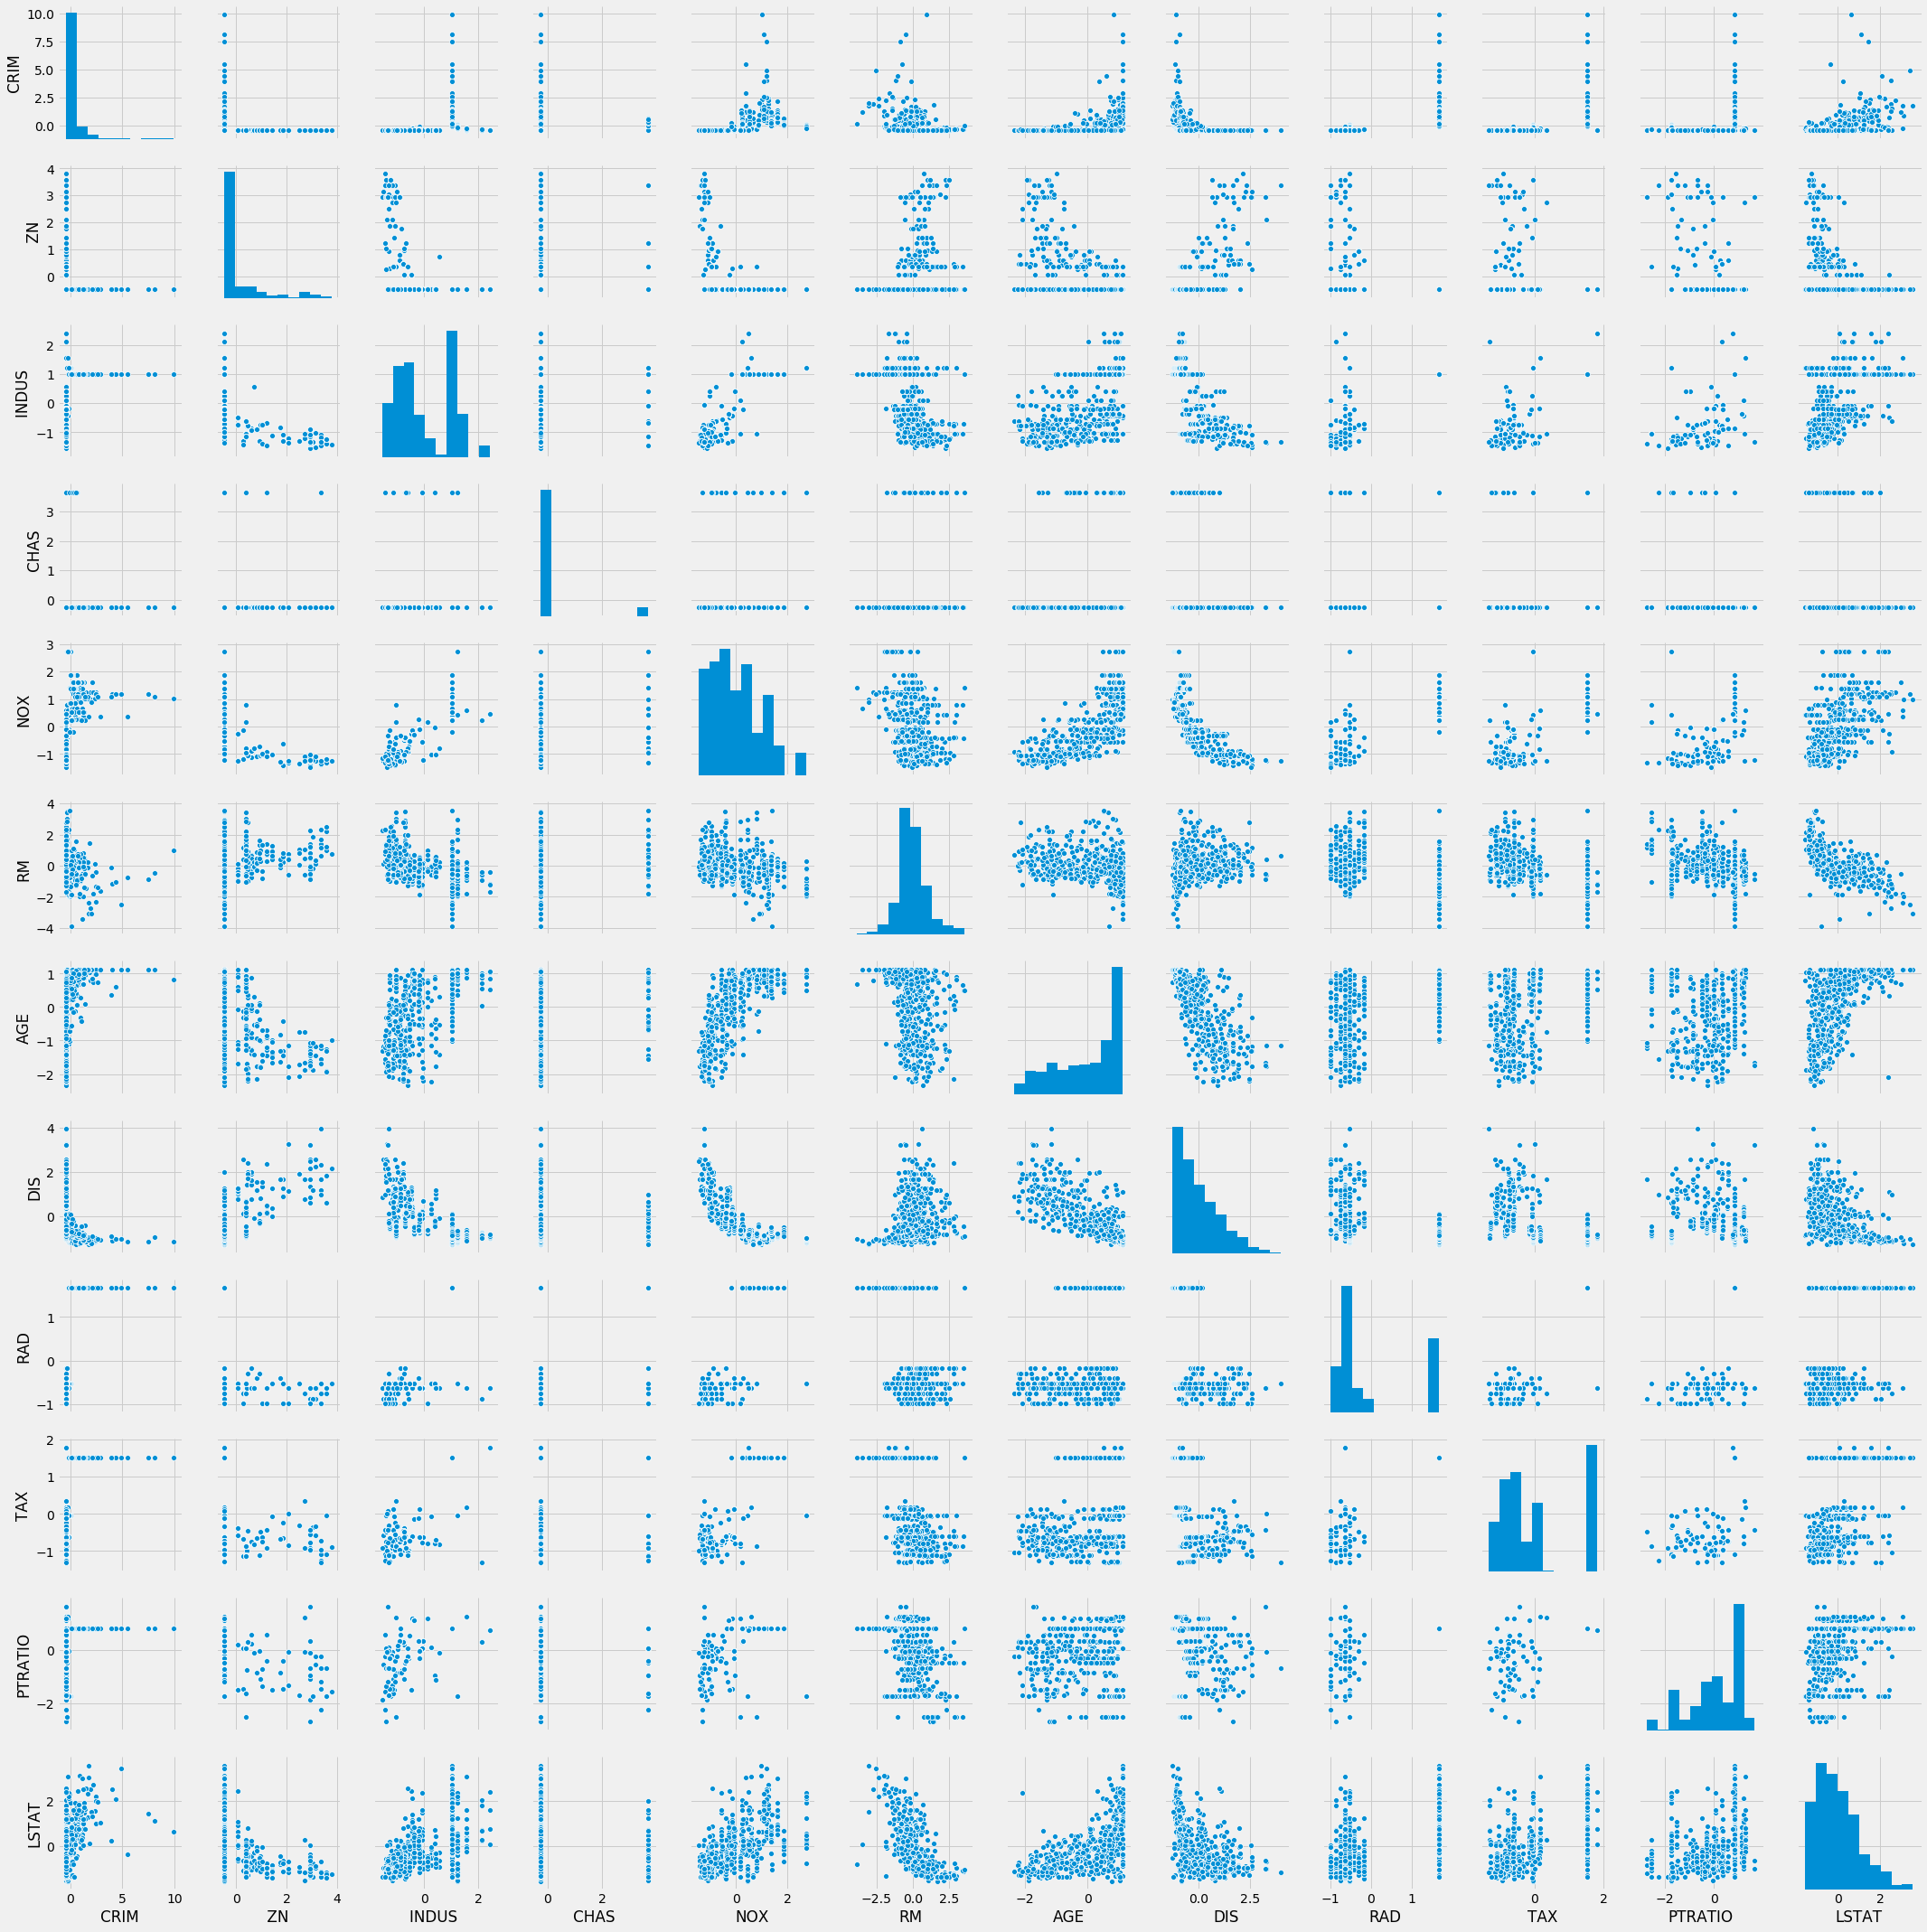

In [88]:
# pairplot() to check variable relations

import seaborn as sns

sns.pairplot(X);

####  Determing Pearson scores using scipy

In [89]:
scipy.stats.pearsonr(x,y)[0]

0.6953599470715393

### Step 6 Same workflow, but this time using `patsy` library.

In [90]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [92]:
from sklearn.model_selection import train_test_split  # if you didn't import this earlier, you'll need to do so now

# Easily changes your variable predictors without reslicing your DataFrame...

y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [93]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Re-runing the model iteratively changing the variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40849325280685733


### Step 7: Comparing and contrasting the results of Statsmodels  & Sklearn

 Regression settings



- Fitting the model with statsmodels is as easy as fitting the model using SKLearn 


- Unlike SKLearn, statsmodels doesn’t automatically fit a constant. So you need to use the method sm.add_constant(X) in order to add a constant. 

- Adding a constant, while not necessary, makes your line fit much better

- SKLearn is easier to use for cross-validation and plotting models

- Unlike with Statsmodels, SKLearn does not have a method like summary. So we have to print the coefficients separately

- The main benefit of using statsmodels is the other statistics it provides.

- One of the assumptions of linear regression models is normality of our data. 

In the last table of the summary of statsmodels are testing the normality of data.
This is a more precise way than graphing the data to determine if it is normal or not.

- Deciding on Important Variables. Variable selection

Statsmodels also helps us determine which of our variables are statistically significant through the p-values.

We compute the F-statistic and examine the associated p-value. If we conclude on the basis of that p-value that at least one of the predictors is related to the response. 

Then we look at the individual p-values. If p-value is <.05, then that variable is statistically significant. 

- To perform variable selection we tried out a lot of different models, each containing a different subset of the predictors

We used backward selection, a classical approach for this task: we put in all of our variables and then dropped NOX and INDUS variables that have a p-value greater than 0.05. 



### Remarks:

- Since SKLearn has more useful features, I use it to build the final model

- I usef Statsmodels as a good method to analyze the data before putting it into the model!

### Step 8: Then Why Patsy?

1. It can be used for building regression models that have a non-linear component

One of the assumption of linear models is additivity. Allowing for interaction effects relaxes the additive assumption

Ex: if we want to regress MEDV against variables RM, DIS, TAX and allow for the interaction of DIS and TAX, then we simply write a line of code and Patsy takes care of building appropriate matrices. (see lm() in R programming)

patsy.dmatrices("MEDV ~ RM + DID + TAX + TAX:DIS", data=df)
     

2. Ideally, plots of Residuals versus predicted will show no fitted discernible pattern. 
The presence of a pattern may indicate a problem with some aspect of the linear model.
If the residual plot indicates that there are non-linear associations in the
data, then a simple approach is to use non-linear transformations of the
predictors, such as log(X) in the regression model

Patsy allows also data transformations like log(X):
    
patsy.dmatrices("MEDV ~ log(CRIM) + RM", data=df)



### more ...



- Patsy describe models in general terms. It doesn’t know or care whether you ultimately want to do linear regression. 

- Patsy’s goal is to become the standard high-level interface to describing statistical models


